In [2]:
#Mount the G Drive to access the data set
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [4]:
vocab = ["Indonesia", "Samarinda", "Kalimantan", "Jakarta", "Singapura",    # B-LOC
         "Timur", "Negara", "Tenggara", "Tengah", "Barat",                  # I-LOC
         "Majelis", "Konsil", "Partai", "Perserikatan", "Kementerian",      # B-ORG
         "Negeri", "Dinas", "Konstitusi", "Dewan", "Nasional",              # I-ORG
         "Anis", "Nasir", "Jokowi", "Akbar", "Soesilo",                     # B-PER
         "Soekarnoputri", "Tsangirai", "Gunawan", "Ningrum", "Hockey",      # I-PER
         "menang", "dianggap", "konsultasi", "mencabut", "adalah",          # O
]

In [13]:
# importing the module
import json
 
# Opening JSON file
def loadJSON(filename):
  data = {}
  with open(filename) as json_file:
      data = json.load(json_file)
  return data

In [14]:
idx2tag = loadJSON('/content/drive/MyDrive/Colab Notebooks/FP-DM/output/idx2tag.json')
tag2idx = loadJSON('/content/drive/MyDrive/Colab Notebooks/FP-DM/output/tag2idx.json')
token2idx = loadJSON('/content/drive/MyDrive/Colab Notebooks/FP-DM/output/token2idx.json')
idx2token = loadJSON('/content/drive/MyDrive/Colab Notebooks/FP-DM/output/idx2token.json')
print(idx2tag)

{'0': 'O', '1': 'I-LOC', '2': 'B-ORG', '3': 'I-PER', '4': 'B-PER', '5': 'I-ORG', '6': 'B-LOC'}


# Glove

In [1]:
! pip install glove-python-binary

     |████████████████████████████████| 948 kB 23.3 MB/s 


In [3]:
from glove import Corpus, Glove
glove_model = Glove.load('/content/drive/MyDrive/Colab Notebooks/FP-DM/models/word_embeddings/glove5_300_100.txt')

In [5]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


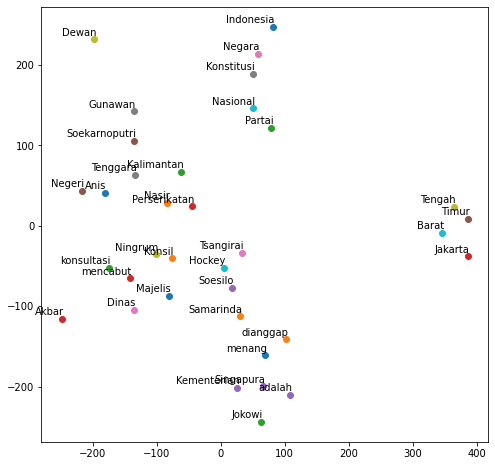

In [6]:
def plot_glove(model):
    labels = []
    wordvecs = []

    for word in vocab:
        wordvecs.append(model.word_vectors[model.dictionary[word]])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=3, n_components=2, init='pca', random_state=42)
    coordinates = tsne_model.fit_transform(wordvecs)

    x = []
    y = []
    for value in coordinates:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(8,8)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(2, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

plot_glove(glove_model)

# Word2Vec

In [7]:
from gensim.models import KeyedVectors

w2v_model = KeyedVectors.load('/content/drive/MyDrive/Colab Notebooks/FP-DM/models/word_embeddings/w2v5_300_100.bin')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


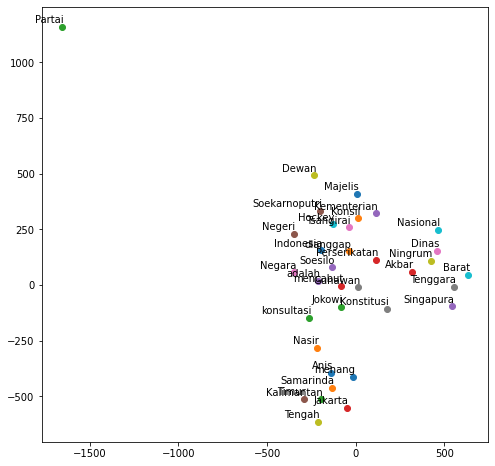

In [21]:
def tsne_plot(model, vocab):
    labels = []
    wordvecs = []

    for word in vocab:
        wordvecs.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=3, n_components=2, init='pca', random_state=42)
    coordinates = tsne_model.fit_transform(wordvecs)

    x = []
    y = []
    for value in coordinates:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(8,8)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(2, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

tsne_plot(w2v_model, vocab)

# fastText

In [9]:
from gensim.models import KeyedVectors

fasttext_model = KeyedVectors.load('/content/drive/MyDrive/Colab Notebooks/FP-DM/models/word_embeddings/FastText5_300_100.bin')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


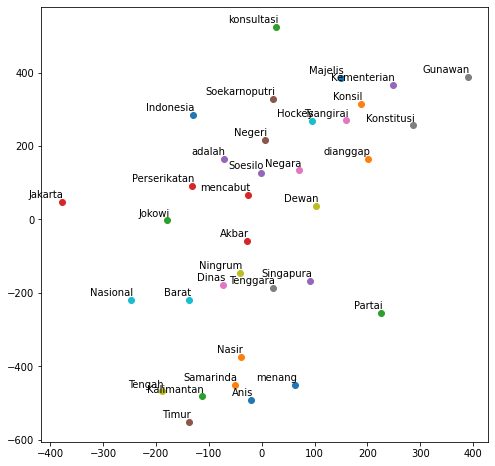

In [10]:
tsne_plot(fasttext_model, vocab)

# Keras Embedding 

In [11]:
import tensorflow as tf

keras_model = tf.keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/FP-DM/model/LSTM_baseline_300.h5')
keras_weights = keras_model.get_layer("embedding").get_weights()[0]

In [33]:
def index(word):
  return token2idx[word]
def token(index):
  return idx2token[str(index)]

In [34]:
index_vocab = list(map(index, vocab))
vocab_lagi = list(map(token, index_vocab))
print(index_vocab)
print(vocab_lagi)

[1745, 1236, 5939, 1547, 2307, 1298, 4522, 3238, 3540, 1403, 1735, 3241, 7746, 6246, 2912, 4556, 129, 2870, 5406, 6931, 552, 1083, 8234, 4662, 2299, 2093, 2246, 1684, 2845, 7751, 3121, 5262, 248, 2834, 2039]
['Indonesia', 'Samarinda', 'Kalimantan', 'Jakarta', 'Singapura', 'Timur', 'Negara', 'Tenggara', 'Tengah', 'Barat', 'Majelis', 'Konsil', 'Partai', 'Perserikatan', 'Kementerian', 'Negeri', 'Dinas', 'Konstitusi', 'Dewan', 'Nasional', 'Anis', 'Nasir', 'Jokowi', 'Akbar', 'Soesilo', 'Soekarnoputri', 'Tsangirai', 'Gunawan', 'Ningrum', 'Hockey', 'menang', 'dianggap', 'konsultasi', 'mencabut', 'adalah']


In [35]:
def plot_keras(model, vocab):
    labels = []
    wordvecs = []

    for word in vocab:
        wordvecs.append(model[word])
        labels.append(idx2token[str(word)])
    
    tsne_model = TSNE(perplexity=3, n_components=2, init='pca', random_state=42)
    coordinates = tsne_model.fit_transform(wordvecs)

    x = []
    y = []
    for value in coordinates:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(8,8)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(2, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


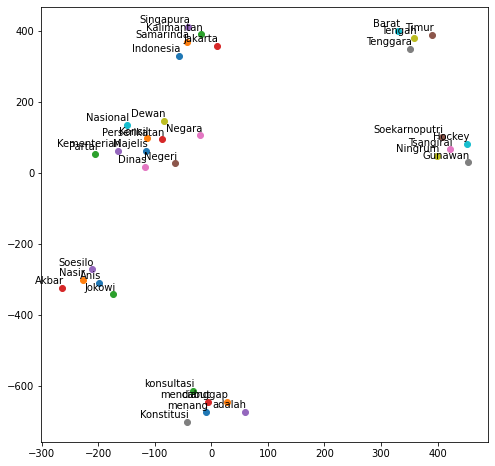

In [36]:
plot_keras(keras_weights, index_vocab)